In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import requests
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/bangkok_traffy.csv")
df.describe()

,star,count_reopen
count,274097.000000,787026.000000
mean,3.872801,0.123485
std,1.471863,0.823554
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,100.000000


In [4]:
df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
290654,4DP4EP,"{ร้องเรียน,คลอง,ถนน}","เขตหนองจอก,สน.ลำผักชี,สำนักงานตำรวจแห่งชาติ (R...",ปัญหา: เหตุเดือดร้อนรำคาญ เนื่องจาก พบมีรถบรรท...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.86314,13.85576","Chueam Samphan Road , Krathum Rai , 10530 Nong...",กระทุ่มราย,หนองจอก,จังหวัดกรุงเทพมหานคร,2023-06-07 10:22:23.481248+00,เสร็จสิ้น,NaN,0,2023-12-18 00:06:47.669151+00
323099,2023-FUN287,{ถนน},"เขตดอนเมือง,การรถไฟแห่งประเทศไทย",ถนน,https://storage.googleapis.com/traffy_public_b...,NaN,"100.60791,13.93350",เลขที่ 210 ถนน เชิดวุฒากาศ แขวงสีกัน เขตดอนเมื...,สนามบิน,ดอนเมือง,กรุงเทพมหานคร,2023-07-14 00:21:29.045497+00,รอรับเรื่อง,NaN,0,2023-07-14 03:08:39.629618+00
740741,V2PRUU,{ถนน},"เขตดินแดง,ฝ่ายโยธา เขตดินแดง,การไฟฟ้านครหลวง เ...",ปัญหา: ภายในซอยดังกล่าว บริเวณหน้าคอนโด อสมท. ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.56453,13.76538","548/4 ซ. อยู่เจริญ 21 Dindeang, Ratchada, กรุง...",ดินแดง,ดินแดง,จังหวัดกรุงเทพมหานคร,2024-11-21 04:49:21.27236+00,กำลังดำเนินการ,NaN,0,2024-11-26 13:30:50.294668+00
493349,L9E943,"{เสียงรบกวน,ถนน}","เขตบางกะปิ,สน.ลาดพร้าว,สำนักงานตำรวจแห่งชาติ (...",ปัญหา: ภายในชุมชนสุขเจริญพัฒนา บริเวณตึกแถวให้...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.63107,13.80468",3223 ถนน ลาดพร้าว แขวงคลองจั่น เขตบางกะปิ กรุง...,คลองจั่น,บางกะปิ,จังหวัดกรุงเทพมหานคร,2024-02-02 20:16:44.15108+00,เสร็จสิ้น,NaN,0,2024-02-03 05:28:53.295816+00
3831,2022-4UVK8Z,{},"เขตบางเขน,ผอ.เขตบางเขน (น.ส.อัญชนา),กลุ่มกรุงเ...","13°52'24.4""N 100°38'37.2""E\nhttps://goo.gl/map...",https://storage.googleapis.com/traffy_public_b...,NaN,"100.64363,13.87344",433 ถ. วัชรพล แขวง ท่าแร้ง เขตบางเขน กรุงเทพมห...,ท่าแร้ง,บางเขน,กรุงเทพมหานคร,2022-06-02 10:38:58.540838+00,เสร็จสิ้น,NaN,0,2022-06-12 10:09:40.717892+00


# Date

In [5]:
finished_df = df[df['state'] == 'เสร็จสิ้น']

In [6]:
filtered_df = finished_df.dropna(axis=0, how='any', subset=['timestamp', 'last_activity'])

In [7]:
def toDate(serie):
    return pd.to_datetime(serie, format='ISO8601').dt.tz_localize(None)

filtered_df['timestamp'] = toDate(filtered_df['timestamp'])
filtered_df['last_activity'] = toDate(filtered_df['last_activity'])

filtered_df['duration'] = (filtered_df['last_activity'] - filtered_df['timestamp']).dt.total_seconds() // 60
filtered_df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,duration
621677,2024-3YRA2D,{แสงสว่าง},"เขตทุ่งครุ,สำนักการโยธา กทม.,การไฟฟ้านครหลวง เ...",ไฟทาง หน้าโรงเรียนนาหลวง ถ.พุทธบูชา เสาต้นที่ ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.49402,13.64820",60/1 ถนน พุทธบูชา แขวงบางมด เขตทุ่งครุ กรุงเทพ...,บางมด,ทุ่งครุ,กรุงเทพมหานคร,2024-07-09 16:11:02.292048,เสร็จสิ้น,NaN,0,2024-08-14 02:17:37.630713,51006.0
613708,CX7CJV,"{ทางเท้า,ถนน}","เขตคันนายาว,ฝ่ายเทศกิจ เขตคันนายาว",ปัญหา: ริมถนนดังกล่าว ขอให้มีการตรวจสอบสถานที่...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.68124,13.82069",11/5 ถ. รามอินทรา แขวงคันนายาว เขตคันนายาว กรุ...,คันนายาว,คันนายาว,จังหวัดกรุงเทพมหานคร,2024-07-01 07:13:06.529853,เสร็จสิ้น,1.0,1,2024-07-03 06:22:30.248617,2829.0
426158,2023-D2AYGZ,{กีดขวาง},"เขตลาดพร้าว,สน.โชคชัย,สำนักงานตำรวจแห่งชาติ (R...",มีมอไซค์มาจอดขวางทางเข้าออกซอย เยอะแยะไปหมด \n...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.60992,13.81538",4 ซอย นาคนิวาส 49 แขวงลาดพร้าว เขตลาดพร้าว กรุ...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2023-11-11 16:21:50.609985,เสร็จสิ้น,NaN,0,2024-04-25 06:09:33.173315,238427.0
57088,2022-H2L9X6,{ถนน},"เขตหนองจอก,สำนักการโยธา กทม.,ฝ่ายโยธา เขตหนองจ...",ขออนุญาตแจ้งพื้นผิวถนนและไหล่ทางชำรุด บนถนนสัง...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.82931,13.78326",11 ซอย สังฆประชา แขวง ลำผักชี เขต หนองจอก กรุง...,ลำผักชี,หนองจอก,กรุงเทพมหานคร,2022-06-28 02:37:36.950079,เสร็จสิ้น,4.0,0,2023-01-27 02:19:54.620706,306702.0
161448,2022-NQMWH4,{สะพาน},"เขตดอนเมือง,กรมทางหลวง",สะพานข้ามถนนพหลโยธิน กม.27 ที่ทำการปิดปรับปรุง...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.62347,13.94429",WJVF+MF6 แขวง สายไหม เขตสายไหม กรุงเทพมหานคร 1...,สนามบิน,ดอนเมือง,กรุงเทพมหานคร,2022-10-17 09:54:16.015859,เสร็จสิ้น,1.0,0,2023-09-06 03:03:59.552028,466149.0


In [8]:
filtered_df['type'].fillna('{}', inplace=True)
filtered_df['type'].isna().sum()

/tmp/ipykernel_58908/4244501731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['type'].fillna('{}', inplace=True)


np.int64(0)

In [9]:
# Define allowed categories
target_types = {
 '',
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร'
}

# Function to convert string to list
def parse_categories(s):
    # Remove curly braces and split
    return s.strip('{}').split(',')

# Parse the string column
filtered_df['type_list'] = filtered_df['type'].apply(parse_categories)

# Create binary flags
for cat in target_types:
    filtered_df[cat] = filtered_df['type_list'].apply(lambda lst: int(cat in lst))

# Create 'Others' column
filtered_df['Others'] = filtered_df['type_list'].apply(
    lambda lst: int(any(c not in target_types for c in lst))
)

# Drop intermediate column if you want
filtered_df.drop(columns='type_list', inplace=True)

filtered_df[['type'] + list(target_types)].sample(5)

,type,,สายไฟ,ความปลอดภัย,ท่อระบายน้ำ,ป้าย,กีดขวาง,สอบถาม,ถนน,ป้ายจราจร,...,ร้องเรียน,ทางเท้า,สะพาน,การเดินทาง,เสียงรบกวน,เสนอแนะ,แสงสว่าง,สัตว์จรจัด,จราจร,PM2.5
386007,{แสงสว่าง},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93159,{},1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697495,{ทางเท้า},0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
518675,{ท่อระบายน้ำ},0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254050,{ต้นไม้},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Define working hours
start_time = time(9, 30)
end_time = time(15, 30)

def minutes_to_next_working_hour(dt):
    weekday = dt.weekday()  # 0 = Monday, ..., 6 = Sunday
    current_time = dt.time()

    # If it's a weekend or after working hours, find next weekday at 9:30
    if weekday >= 5 or current_time >= end_time:
        # Add days until next weekday (Monday–Friday)
        days_ahead = 1
        while (dt + timedelta(days=days_ahead)).weekday() >= 5:
            days_ahead += 1
        next_working_start = datetime.combine((dt + timedelta(days=days_ahead)).date(), start_time)
        return int((next_working_start - dt).total_seconds() // 60)

    # Before work hours today
    elif current_time < start_time:
        today_start = datetime.combine(dt.date(), start_time)
        return int((today_start - dt).total_seconds() // 60)

    # During working hours
    else:
        return 0

# Apply function to timestamp column
filtered_df['until_working_time'] = filtered_df['timestamp'].apply(minutes_to_next_working_hour)

filtered_df[['timestamp', 'until_working_time']].sample(5)

,timestamp,until_working_time
411836,2023-10-27 10:06:13.838087,0
588594,2024-06-04 03:08:14.566320,381
210272,2023-02-02 21:48:38.027390,701
278731,2023-05-24 11:50:06.799589,0
475108,2024-01-12 10:36:32.730395,0


# Org's info

In [11]:
limit = 100
org_key = 'bangkok'
url = f'https://publicapi.traffy.in.th/premium-org-fondue/statistic-rank/top-rank-avg-star?org_key={org_key}&limit={limit}'

resp = requests.get(url)
data = resp.json()
orgs = data['results']

pd.DataFrame(orgs).to_csv('data/org.csv')

In [12]:
orgs = pd.read_csv('data/org.csv')
orgs.sample(5)
orgs.drop(columns=['Unnamed: 0'], inplace=True)
# orgs.reset_index(inplace=True)
orgs.set_index('fonduegroup_name', inplace=True)
orgs.sample(5)

,rank,timestamp,fonduegroup_id,post_count_star,post_count_star_stat,avg_star,post_count_all,post_count_finish,post_finish_percentage,avg_duration_minutes_inprogress,avg_duration_minutes_finished
fonduegroup_name,,,,,,,,,,,
เขตดุสิต,5,NaN,17370,3906,"{'star_1': 435, 'star_2': 122, 'star_3': 327, ...",4.13,11237,8977,79.89,17328,91795
เขตสวนหลวง,37,NaN,18050,6777,"{'star_1': 1028, 'star_2': 327, 'star_3': 640,...",3.87,23531,17550,74.58,24844,108200
เขตบางซื่อ,9,NaN,8371,7304,"{'star_1': 750, 'star_2': 253, 'star_3': 810, ...",4.08,20510,17421,84.94,15064,85415
เขตบึงกุ่ม,14,NaN,18031,8796,"{'star_1': 711, 'star_2': 221, 'star_3': 433, ...",4.01,19399,16838,86.80,10829,67143
สำนักพัฒนาสังคม กทม.,51,NaN,18125,199,"{'star_1': 36, 'star_2': 7, 'star_3': 25, 'sta...",3.78,552,507,91.85,14427,53796


In [13]:
# Define target columns
target_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

# Convert organization string to list
filtered_df['orgs_list'] = filtered_df['organization'].str.strip().str.split(',')

# Create filtered_df with NaNs in target columns
filtered_df[target_cols] = np.nan

# Explode orgs_list to merge with orgs
exploded = filtered_df[['orgs_list']].explode('orgs_list').reset_index()
exploded['orgs_list'] = exploded['orgs_list'].str.strip()

# Join with orgs DataFrame
merged = exploded.merge(orgs[target_cols], left_on='orgs_list', right_index=True, how='left')

# Aggregate mean values for each original row
means = merged.groupby('index')[target_cols].mean()

# Assign the means back to filtered_df
filtered_df.loc[means.index, target_cols] = means

# Result
filtered_df[['orgs_list'] + target_cols]

filtered_df.drop(columns=['orgs_list'], inplace=True)


In [14]:
filtered_df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity', 'duration', '',
       'สายไฟ', 'ความปลอดภัย', 'ท่อระบายน้ำ', 'ป้าย', 'กีดขวาง', 'สอบถาม',
       'ถนน', 'ป้ายจราจร', 'น้ำท่วม', 'คนจรจัด', 'ห้องน้ำ', 'ต้นไม้', 'คลอง',
       'ความสะอาด', 'ร้องเรียน', 'ทางเท้า', 'สะพาน', 'การเดินทาง',
       'เสียงรบกวน', 'เสนอแนะ', 'แสงสว่าง', 'สัตว์จรจัด', 'จราจร', 'PM2.5',
       'Others', 'until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished'],
      dtype='object')

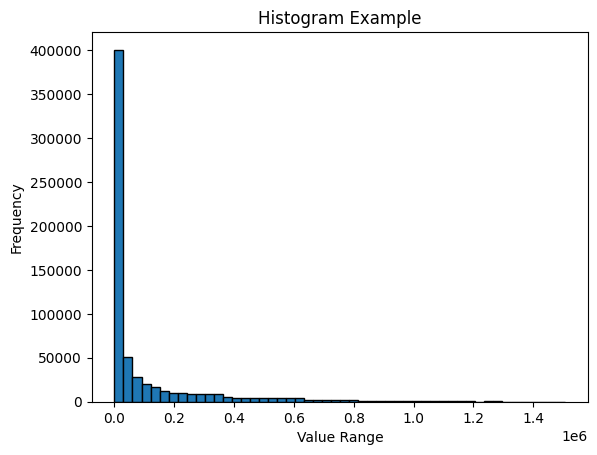

In [15]:
s = filtered_df['duration'] 
threshold = s.quantile(1)
s_trimmed = s[s < threshold]

s_trimmed.plot(kind='hist', bins=50, edgecolor='black')

# Add labels and title
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show plot
plt.show()


In [16]:
# # Assuming `s` is your Pandas Series
# s = filtered_df['duration']
# Q1 = s.quantile(0.25)
# Q3 = s.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# filtered_df = filtered_df[(s >= lower_bound) & (s <= upper_bound)]

# s_filtered = filtered_df['duration']
# # Plot histogram without outliers
# s_filtered.plot(kind='hist', bins=50, edgecolor='black')
# plt.xlabel('Value (without outliers)')
# plt.ylabel('Frequency')
# plt.title('Histogram without Outliers (IQR Method)')
# plt.show()

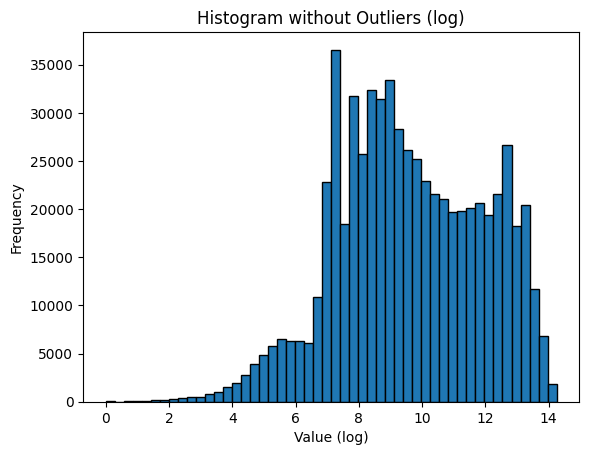

In [17]:
filtered_df = filtered_df[filtered_df['duration'] > 0]

filtered_df['log_duration'] = filtered_df['duration'].apply(np.log) 

filtered_df['log_duration'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Value (log)')
plt.ylabel('Frequency')
plt.title('Histogram without Outliers (log)')
plt.show()

In [18]:
types = [
 '',
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร',
 'Others'
]

feature_cols = [
    'until_working_time',
    'avg_star',
    'post_finish_percentage',
    'avg_duration_minutes_finished',
    'log_duration',
]

filtered_df = filtered_df[feature_cols + types]
filtered_df

,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,log_duration,,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,0,4.08,84.940,85415.0,12.885940,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1113,3.82,84.320,76399.0,12.888172,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1706,3.86,84.510,54852.0,12.805165,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.08,84.940,85415.0,13.068182,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,4.09,85.420,50067.0,12.776852,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786856,873,3.92,73.165,138599.0,6.109248,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786892,571,3.59,72.540,92196.0,4.406719,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786893,570,4.00,86.020,65512.0,4.605170,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786944,492,3.87,84.180,72567.0,4.248495,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
filtered_df.isna().sum()

until_working_time                 0
avg_star                         922
post_finish_percentage           922
avg_duration_minutes_finished    922
log_duration                       0
                                   0
ป้าย                               0
ความสะอาด                          0
แสงสว่าง                           0
สอบถาม                             0
ร้องเรียน                          0
การเดินทาง                         0
จราจร                              0
ท่อระบายน้ำ                        0
สะพาน                              0
เสียงรบกวน                         0
ต้นไม้                             0
คนจรจัด                            0
คลอง                               0
ถนน                                0
เสนอแนะ                            0
กีดขวาง                            0
สายไฟ                              0
PM2.5                              0
น้ำท่วม                            0
ทางเท้า                            0
สัตว์จรจัด                         0
ค

In [27]:
na_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

filtered_df[na_cols] = filtered_df[na_cols].fillna(filtered_df[na_cols].mean())

In [28]:
filtered_df.isna().sum()

until_working_time               0
avg_star                         0
post_finish_percentage           0
avg_duration_minutes_finished    0
log_duration                     0
                                 0
ป้าย                             0
ความสะอาด                        0
แสงสว่าง                         0
สอบถาม                           0
ร้องเรียน                        0
การเดินทาง                       0
จราจร                            0
ท่อระบายน้ำ                      0
สะพาน                            0
เสียงรบกวน                       0
ต้นไม้                           0
คนจรจัด                          0
คลอง                             0
ถนน                              0
เสนอแนะ                          0
กีดขวาง                          0
สายไฟ                            0
PM2.5                            0
น้ำท่วม                          0
ทางเท้า                          0
สัตว์จรจัด                       0
ความปลอดภัย                      0
ห้องน้ำ             

In [29]:
display(filtered_df)
filtered_df.to_csv('data/clean.csv')

,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,log_duration,,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
0,0,4.08,84.940,85415.0,12.885940,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1113,3.82,84.320,76399.0,12.888172,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1706,3.86,84.510,54852.0,12.805165,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4.08,84.940,85415.0,13.068182,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,4.09,85.420,50067.0,12.776852,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786856,873,3.92,73.165,138599.0,6.109248,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786892,571,3.59,72.540,92196.0,4.406719,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786893,570,4.00,86.020,65512.0,4.605170,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786944,492,3.87,84.180,72567.0,4.248495,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
